In [8]:
import pandas as pd
import numpy as np
import wrangle
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

### 1.
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

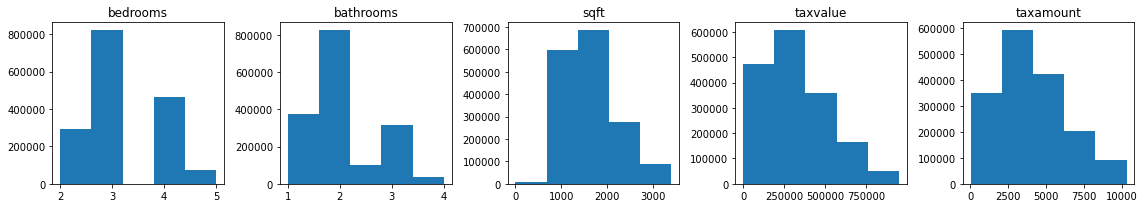

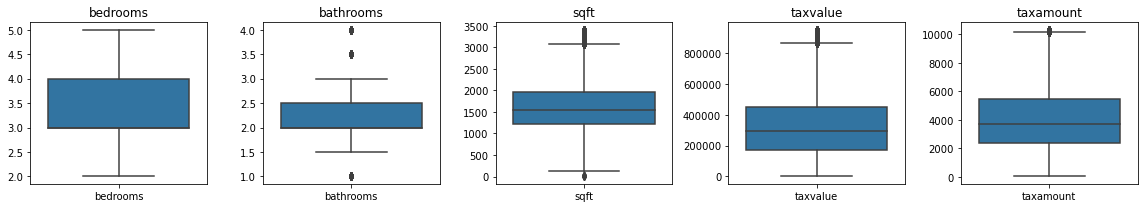

In [9]:
#Take a look at the distributions
train, validate , test = wrangle.wrangle_zillow()

In [10]:
# Verify the shape
train.shape, test.shape, validate.shape

((927616, 7), (331292, 7), (397550, 7))

In [11]:
train.head()

,bedrooms,bathrooms,sqft,taxvalue,yearbuilt,taxamount,fips
1269290,4,1.0,1215,251579,1947,3447.97,6037
130184,3,2.0,1821,552917,1974,6783.77,6037
1147921,4,2.0,1690,156223,1958,1969.61,6037
374670,4,4.0,2324,824440,1925,9982.88,6037
461818,3,3.0,2076,476345,1990,5863.90,6059


In [12]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [13]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object
scaler.fit(train[['sqft']])

# 3. use the object. Scale total_bill only
train['sqft_scaled'] = scaler.transform(train[['sqft']])


In [14]:
train.head()

,bedrooms,bathrooms,sqft,taxvalue,yearbuilt,taxamount,fips,sqft_scaled
1269290,4,1.0,1215,251579,1947,3447.97,6037,0.355947
130184,3,2.0,1821,552917,1974,6783.77,6037,0.533921
1147921,4,2.0,1690,156223,1958,1969.61,6037,0.495448
374670,4,4.0,2324,824440,1925,9982.88,6037,0.681645
461818,3,3.0,2076,476345,1990,5863.90,6059,0.608811


In [15]:
train['sqft_scaled'] = scaler.inverse_transform(train[['sqft_scaled']])

### 2. 
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [16]:
train.head()

,bedrooms,bathrooms,sqft,taxvalue,yearbuilt,taxamount,fips,sqft_scaled
1269290,4,1.0,1215,251579,1947,3447.97,6037,1215.0
130184,3,2.0,1821,552917,1974,6783.77,6037,1821.0
1147921,4,2.0,1690,156223,1958,1969.61,6037,1690.0
374670,4,4.0,2324,824440,1925,9982.88,6037,2324.0
461818,3,3.0,2076,476345,1990,5863.90,6059,2076.0


### 3. 
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

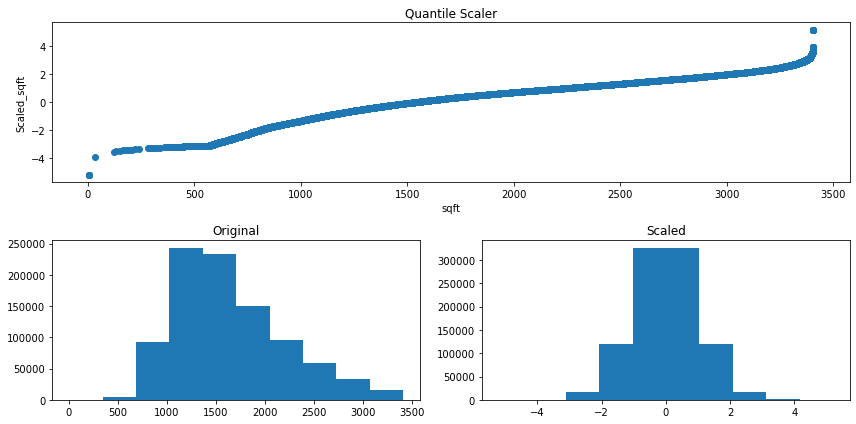

In [21]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'sqft')

## 4
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

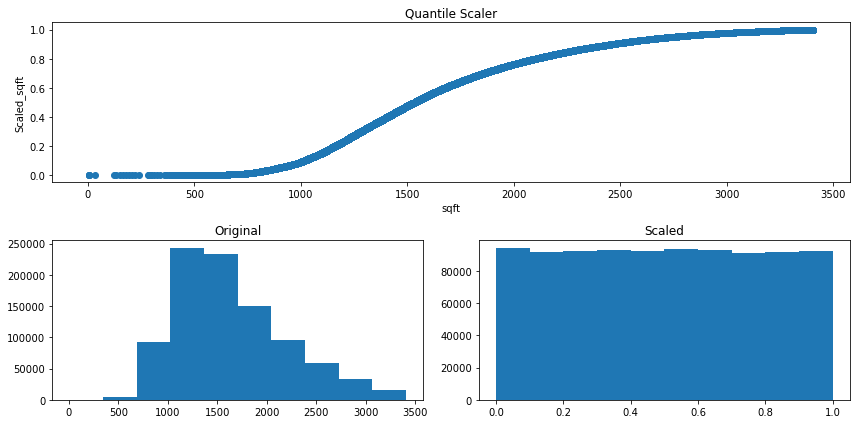

In [22]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'sqft')

## 5 
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [23]:
## Added it to wrangle.py under the Scale section